In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv('data/vgsales.csv')
data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [3]:
data.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [4]:
data['Publisher'].isnull().sum()

58

In [5]:
data['Year'].isna().sum()

271

In [6]:
data['Year'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2003., 1986., 2000.,   nan, 1995., 2016., 1991., 1981., 1987.,
       1980., 1983., 2020., 2017.])

In [7]:
data['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [8]:
data['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [10]:
data['Name'].unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Plushees', 'Woody Woodpecker in Crazy Castle 5', 'Know How 2'],
      dtype=object)

In [11]:
data_by_year = data.groupby(by='Year', axis=0, as_index=False).sum(numeric_only=True)
data_by_year.head()

,Year,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1980.0,29826,10.59,0.67,0.00,0.12,11.38
1,1981.0,190488,33.40,1.96,0.00,0.32,35.77
2,1982.0,149186,26.92,1.65,0.00,0.31,28.86
3,1983.0,56759,7.76,0.80,8.10,0.14,16.79
4,1984.0,22911,33.28,2.10,14.27,0.70,50.36


In [12]:
data_by_platform = data.groupby(by='Platform', axis=0, as_index=False).sum(numeric_only=True)
data_by_platform.head()

,Platform,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,2600,585665,229928.0,90.60,5.47,0.00,0.91,97.08
1,3DO,43118,5984.0,0.00,0.00,0.10,0.00,0.10
2,3DS,4662644,1006531.0,78.87,58.52,97.35,12.63,247.46
3,DC,456114,103997.0,5.43,1.69,8.56,0.27,15.97
4,DS,20845831,4283493.0,390.71,194.65,175.57,60.53,822.49


<AxesSubplot: xlabel='Platform'>

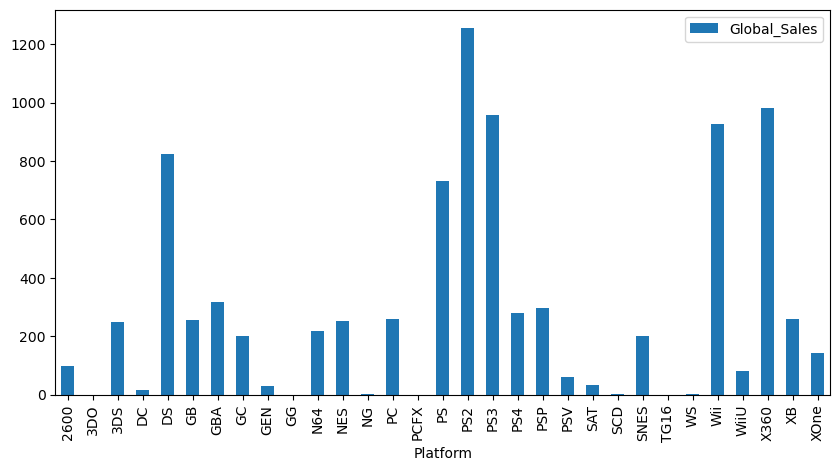

In [17]:
#plt.bar(data_by_platform['Platform'], data_by_platform['Global_Sales'])
data_by_platform.plot.bar(x='Platform', y='Global_Sales', figsize=(10,5))